In [1]:
import pyopencl as pcl
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dev = pcl.get_platforms()[0].get_devices()[2]

In [3]:
dev.name

'AMD Radeon R9 M370X Compute Engine'

In [4]:
print('local device memory: ', dev.local_mem_size // 1024, 'KB')

local device memory:  32 KB


In [5]:
dev.max_work_group_size

256

In [6]:
clfile = os.path.abspath(os.path.join('..','src','cl','mmath.cl'))
setfile = os.path.abspath(os.path.join('..','src', 'cl', 'settings.h'))
print(os.path.isfile(clfile), os.path.isfile(setfile))

True True


In [7]:
cntx = pcl.Context( [dev])
queue = pcl.CommandQueue(cntx)

In [8]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [9]:
inarr = np.random.normal(size=(16,16)).astype(np.float32)

In [10]:
outarr = np.random.normal(size=(16*4,32)).astype(np.float32)

In [11]:
inbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=inarr)
outbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE | pcl.mem_flags.COPY_HOST_PTR, hostbuf=outarr)

In [12]:
e = prgs.zeroPad(queue,
                 outarr.shape,
                 (16,16),
                 np.int32(inarr.shape[0]),
                 np.int32(inarr.shape[1]),
                 inbuf,
                 np.int32(outarr.shape[0]),
                 np.int32(outarr.shape[1]), 
                 outbuf)

In [13]:
e.wait()

In [14]:
pcl.enqueue_copy(queue, outarr, outbuf).wait()

In [15]:
outarr

array([[-0.26152289, -0.98023987,  0.90099198, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4227975 ,  1.2956171 ,  0.85089654, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26511353, -0.12731043, -1.56002021, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [16]:
outarr.shape

(64, 32)

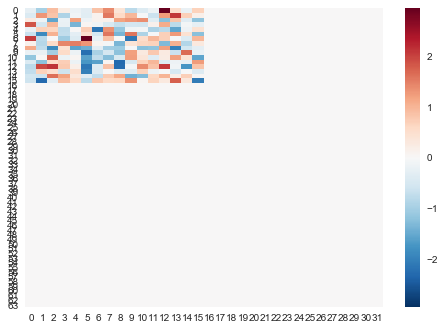

In [17]:
sns.heatmap(outarr)
plt.show()

In [18]:
outarr.size

2048

In [19]:
outarr[-1,-1]

0.0

In [198]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [199]:
inarr = np.ones(shape=(16*3,16*6), dtype=np.float32)
outarr = np.zeros(shape=(inarr.shape[1],inarr.shape[0]), dtype=np.float32)

In [200]:
for x in range(inarr.shape[0]):
    inarr[x,:] *= (x+1)

In [201]:
inbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=inarr)
outbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE | pcl.mem_flags.COPY_HOST_PTR, hostbuf=outarr)
e = prgs.transpose(queue,
                   inarr.shape,
                   (16,16),
                   np.int32(inarr.shape[0]),
                   np.int32(inarr.shape[1]),
                   inbuf,
                   outbuf)

In [202]:
e.wait()
pcl.enqueue_copy(queue, outarr, outbuf).wait()

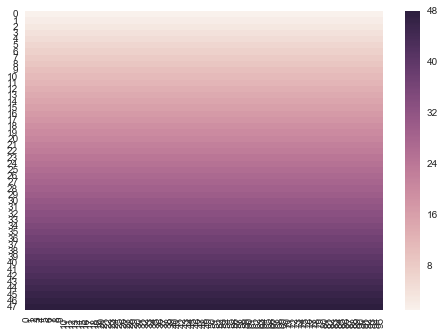

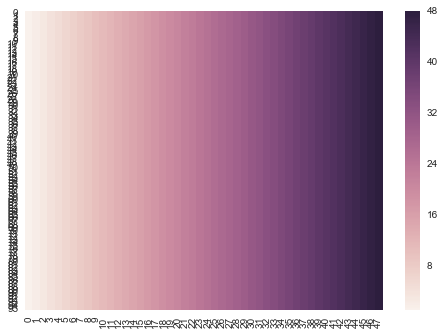

In [203]:
sns.heatmap(inarr)
plt.show()
sns.heatmap(outarr)
plt.show()

In [204]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

In [205]:
inarr = np.ones(shape=(16*3,16*2), dtype=np.float32)
outarr = np.zeros(shape=(inarr.shape[0]-16,inarr.shape[1]-16), dtype=np.float32)
for x in range(inarr.shape[0]):
    inarr[x,:] *= (x+1)

In [206]:
inbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=inarr)
outbuf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE | pcl.mem_flags.COPY_HOST_PTR, hostbuf=outarr)
e = prgs.zeroTrim(queue,
                  inarr.shape,
                  (16,16),
                  np.int32(inarr.shape[0]),
                  np.int32(inarr.shape[1]),
                  inbuf,
                  np.int32(outarr.shape[0]),
                  np.int32(outarr.shape[1]),
                  outbuf)

In [207]:
e.wait()
pcl.enqueue_copy(queue, outarr, outbuf).wait()

In [208]:
outarr

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.],
       [  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   3.,   3.,   3.,   3.],
       [  4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
          4.,   4.,   4.,   4.,   4.],
       [  5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
          5.,   5.,   5.,   5.,   5.],
       [  6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
          6.,   6.,   6.,   6.,   6.],
       [  7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
          7.,   7.,   7.,   7.,   7.],
       [  8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
          8.,   8.,   8.,   8.,   8.],
       [  9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
          9.,   9.,   

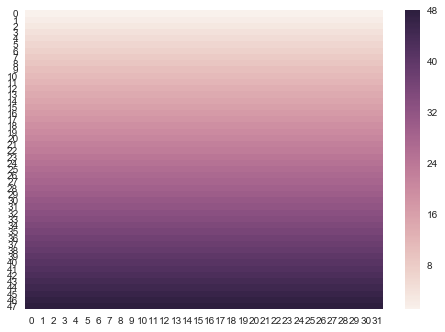

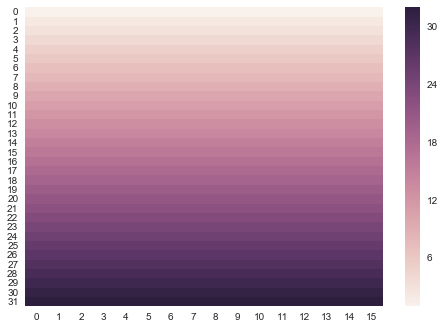

In [209]:
sns.heatmap(inarr)
plt.show()
sns.heatmap(outarr)
plt.show()

In [210]:
# test the matrix multiplication

In [1083]:
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '1'
with open(clfile,'r') as f:
    prgs = pcl.Program(cntx, f.read(),).build(options=[])

/Users/antalek/anaconda/envs/ENVPy3/lib/python3.5/site-packages/pyopencl/cffi_cl.py:1472: CompilerWarning: From-source build succeeded, but resulted in non-empty logs:
Build on <pyopencl.Device 'AMD Radeon R9 M370X Compute Engine' on 'Apple' at 0x1021c00> succeeded, but said:

<program source>:114:13: warning: unused variable 'gid_0'
  const int gid_0 = get_global_id(0);
            ^
<program source>:115:13: warning: unused variable 'gid_1'
  const int gid_1 = get_global_id(1);
            ^

  warn(text, CompilerWarning)


In [1109]:
M = np.int32(16*(16*200))
K = np.int32(16*(16*10))
N = np.int32(16*(16*15))


a = np.ones(shape=(M, K), dtype=np.float32)
b = np.ones(shape=(K, N), dtype=np.float32)
for i in range(0, N):
    b[:, i] *= (i+1)
# a = np.random.normal(size=(M, K)).astype(np.float32)
# b = np.random.normal(size=(K, N)).astype(np.float32)

In [1110]:
%%time
c = a.dot(b)

CPU times: user 12.5 s, sys: 231 ms, total: 12.7 s
Wall time: 6.57 s


In [1111]:
c.nbytes / (1024**3)

0.732421875

In [1112]:
c.dtype, c.shape

(dtype('float32'), (51200, 3840))

In [1113]:
a_buf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=a)
b_buf = pcl.Buffer(cntx, pcl.mem_flags.READ_ONLY | pcl.mem_flags.COPY_HOST_PTR, hostbuf=b)
b_trans_buf = pcl.Buffer(cntx, pcl.mem_flags.READ_WRITE, size=b.nbytes)
c_buf = pcl.Buffer(cntx, pcl.mem_flags.WRITE_ONLY, size=c.nbytes)

In [1114]:
M, K, N

(51200, 2560, 3840)

In [1115]:
c_out = np.zeros(shape=c.shape,dtype=np.float32)

In [1116]:
%%time
# first, transpose b
transpose_b_event = prgs.transpose(queue,
                                   b.shape, 
                                   (16,16),
                                   np.int32(b.shape[0]),
                                   np.int32(b.shape[1]),
                                   b_buf,
                                   b_trans_buf)

# now multiply a and bT
# compute the global and local sizes
# M = np.int32(a.shape[0])
# K = np.int32(a.shape[1])
# N = np.int32(b.shape[1])

g = (int(M/8), int(N/8))
l = (int(128/8), int(128/8))

multiply_event = prgs.SPGMM(queue,
                            g,
                            l,
                            M,
                            N,
                            K,
                            a_buf,
                            b_trans_buf,
                            c_buf)






CPU times: user 4.19 ms, sys: 900 µs, total: 5.09 ms
Wall time: 4.21 ms


In [1117]:
%%time
transpose_b_event.wait()

CPU times: user 825 µs, sys: 324 ms, total: 325 ms
Wall time: 359 ms


In [1118]:
%%time
multiply_event.wait()

CPU times: user 1.65 ms, sys: 2.39 ms, total: 4.04 ms
Wall time: 23.3 s


In [1119]:
%%time
pcl.enqueue_copy(queue, c_out, c_buf).wait()

CPU times: user 882 µs, sys: 184 ms, total: 185 ms
Wall time: 967 ms


In [1120]:
b_trans_arr = np.zeros(shape=b.T.shape, dtype=np.float32)
pcl.enqueue_copy(queue, b_trans_arr, b_trans_buf).wait()

In [1121]:
(b.T == b_trans_arr).all()

True

In [1122]:
c_out

array([[  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       ..., 
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06]], dtype=float32)

In [1123]:
(c_out == c).all()

True

In [1124]:
c_out.shape == c.shape

True

In [1125]:
c_out - c 

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [1126]:
c

array([[  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       ..., 
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06],
       [  2.56000000e+03,   5.12000000e+03,   7.68000000e+03, ...,
          9.82528000e+06,   9.82784000e+06,   9.83040000e+06]], dtype=float32)

In [1127]:
g

(6400, 480)

In [1128]:
c_out[96:96*2, 0:64]

array([[   2560.,    5120.,    7680., ...,  158720.,  161280.,  163840.],
       [   2560.,    5120.,    7680., ...,  158720.,  161280.,  163840.],
       [   2560.,    5120.,    7680., ...,  158720.,  161280.,  163840.],
       ..., 
       [   2560.,    5120.,    7680., ...,  158720.,  161280.,  163840.],
       [   2560.,    5120.,    7680., ...,  158720.,  161280.,  163840.],
       [   2560.,    5120.,    7680., ...,  158720.,  161280.,  163840.]], dtype=float32)

In [1129]:
c_out.shape

(51200, 3840)

In [1130]:
c_out.max()

9830400.0

In [1131]:
M,K,N

(51200, 2560, 3840)

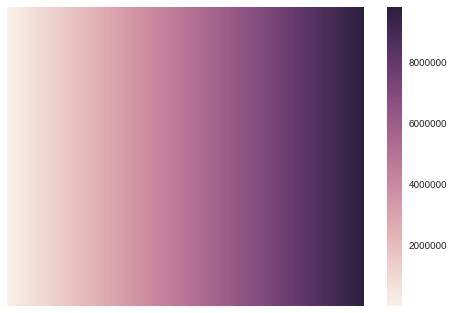

In [ ]:
sns.heatmap(c_out,
            xticklabels=False,
            yticklabels=False)
plt.show()

In [ ]:
sns.heatmap(c,
            xticklabels=False,
            yticklabels=False)
plt.show()